<a href="https://colab.research.google.com/github/Saonoke/PVCK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import os

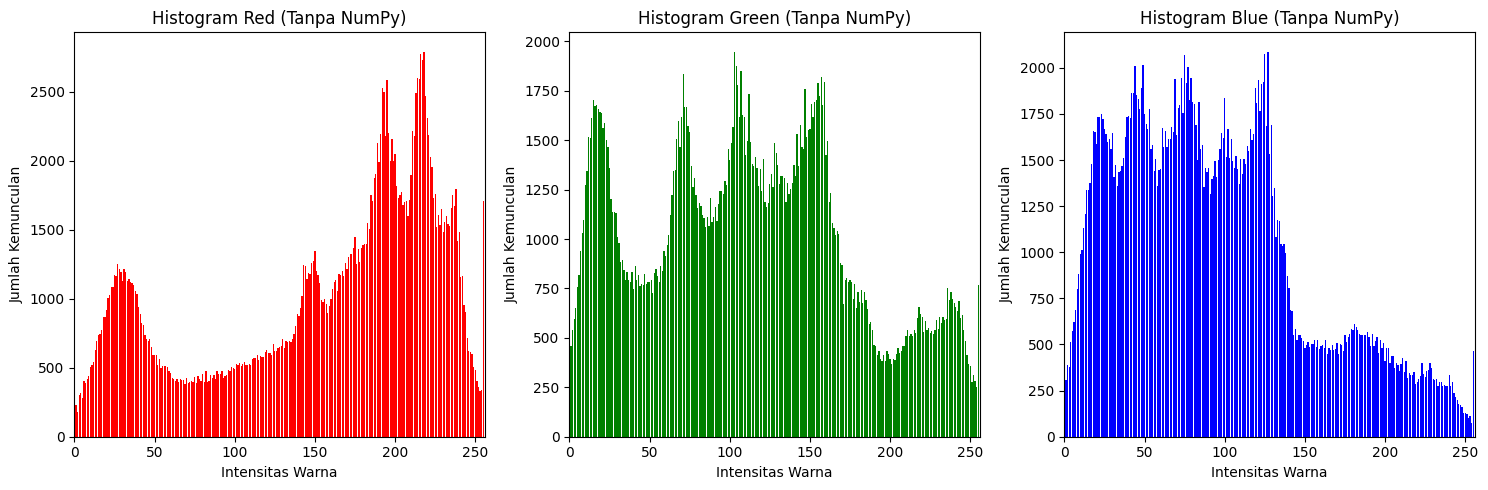

In [ ]:
image = cv.imread('/content/drive/MyDrive/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


# Fungsi untuk menghitung histogram manual
def calculate_histogram(channel):
    histogram = {}
    for row in channel:
        for pixel in row:
            if pixel in histogram:
                histogram[pixel] += 1
            else:
                histogram[pixel] = 1
    return histogram

# Hitung histogram untuk setiap channel
channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')

plt.figure(figsize=(15, 5))

for i, color in enumerate(colors):
    histogram = calculate_histogram(image[:, :, i])

    # Siapkan data untuk plotting
    intensities = sorted(histogram.keys())
    frequencies = [histogram[j] for j in intensities]

    plt.subplot(1, 3, i + 1)
    plt.bar(intensities, frequencies, color=color)
    plt.title(f'Histogram {channels[i]} (Tanpa NumPy)')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

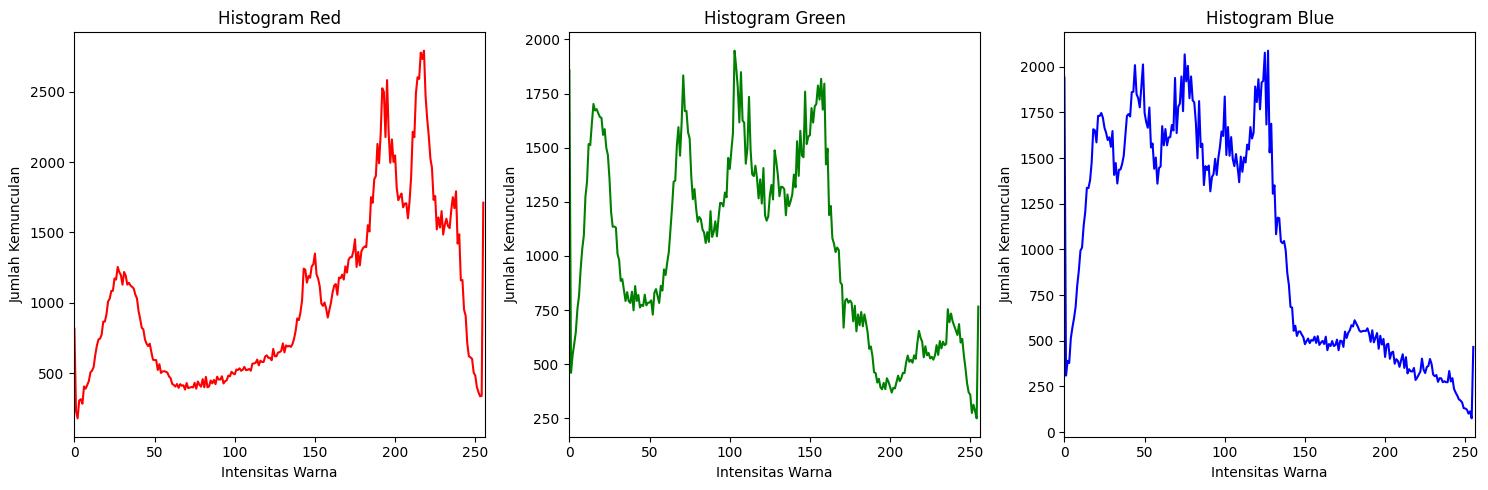

In [ ]:
image = cv.imread('/content/drive/MyDrive/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# print(image.shape)
# Pisahkan setiap channel (R, G, B)
channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')

plt.figure(figsize=(15, 5))

for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    histogram, bins = np.histogram(image[:, :, i], bins=256, range=[0, 256])
    plt.plot(histogram, color=color)
    plt.title(f'Histogram {channels[i]}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

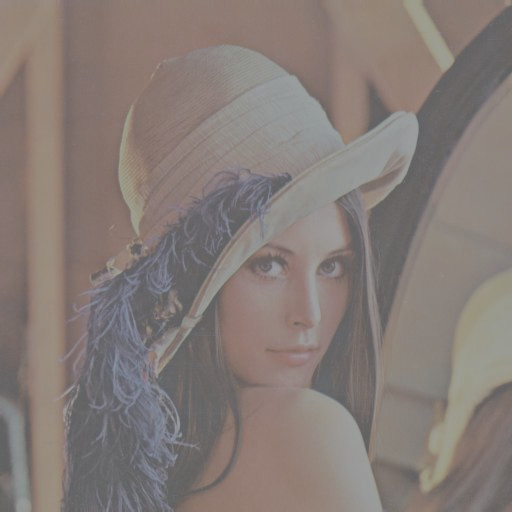

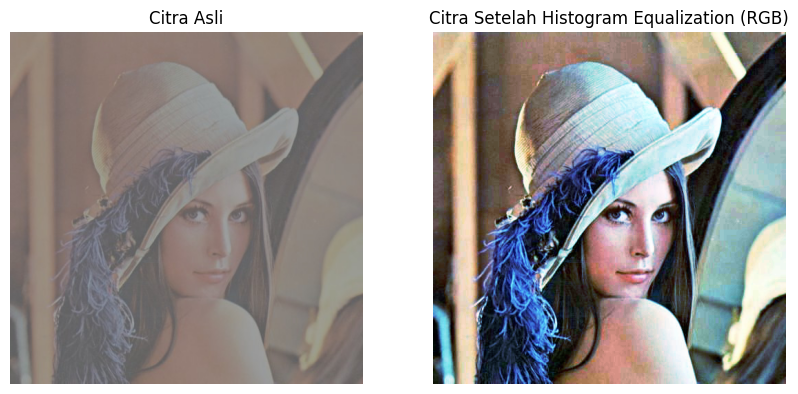

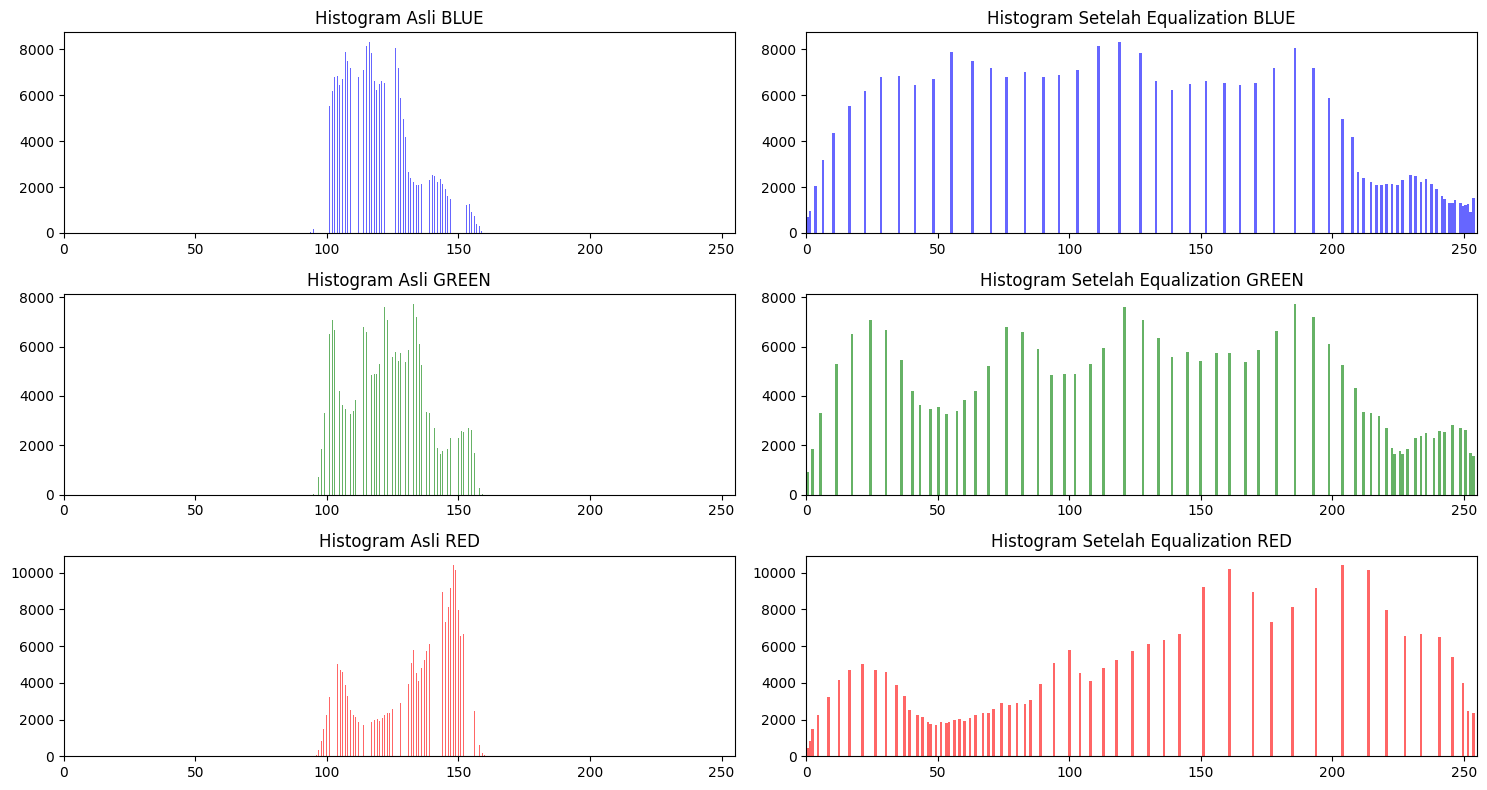

In [ ]:

image = cv.imread('/content/drive/MyDrive/lena_lc.jpg')



def histogram_equalization(channel):
    height, width = channel.shape

    # Step 1: Hitung histogram
    histogram = [0] * 256
    for i in range(height):
        for j in range(width):
            intensity = channel[i][j]
            histogram[intensity] += 1

    # Step 2: Hitung CDF (Cumulative Distribution Function)
    cdf = [0] * 256
    cdf[0] = histogram[0]

    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    # Step 3: Normalisasi CDF menjadi [0, 255]
    cdf_min = min([val for val in cdf if val > 0])
    cdf_max = cdf[-1]
    cdf_normalized = [(cdf[i] - cdf_min) * 255 / (cdf_max - cdf_min) for i in range(256)]
    cdf_normalized = [int(val) for val in cdf_normalized]

    # Step 4: Remap intensitas berdasarkan CDF yang dinormalisasi
    equalized_channel = channel.copy()
    for i in range(height):
        for j in range(width):
            intensity = channel[i][j]
            equalized_channel[i][j] = cdf_normalized[intensity]

    return equalized_channel

# Pisahkan channel RGB
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Lakukan histogram equalization untuk masing-masing channel
equalized_blue = histogram_equalization(blue_channel)
equalized_green = histogram_equalization(green_channel)
equalized_red = histogram_equalization(red_channel)

# Gabungkan kembali channel RGB yang sudah di-equalize
equalized_image = cv.merge([equalized_blue, equalized_green, equalized_red])

# Plot gambar asli dan hasil equalization
plt.figure(figsize=(10, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Gambar setelah equalization
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Citra Setelah Histogram Equalization (RGB)')
plt.axis('off')

plt.show()

# Plot histogram asli dan setelah equalization untuk setiap channel
colors = ['blue', 'green', 'red']
channels = [blue_channel, green_channel, red_channel]
equalized_channels = [equalized_blue, equalized_green, equalized_red]

plt.figure(figsize=(15, 8))

for i, color in enumerate(colors):
    # Histogram asli
    plt.subplot(3, 2, i * 2 + 1)
    plt.hist(channels[i].ravel(), bins=256, color=color, alpha=0.6)
    plt.title(f'Histogram Asli {color.upper()}')
    plt.xlim([0, 255])

    # Histogram setelah equalization
    plt.subplot(3, 2, i * 2 + 2)
    plt.hist(equalized_channels[i].ravel(), bins=256, color=color, alpha=0.6)
    plt.title(f'Histogram Setelah Equalization {color.upper()}')
    plt.xlim([0, 255])

plt.tight_layout()
plt.show()

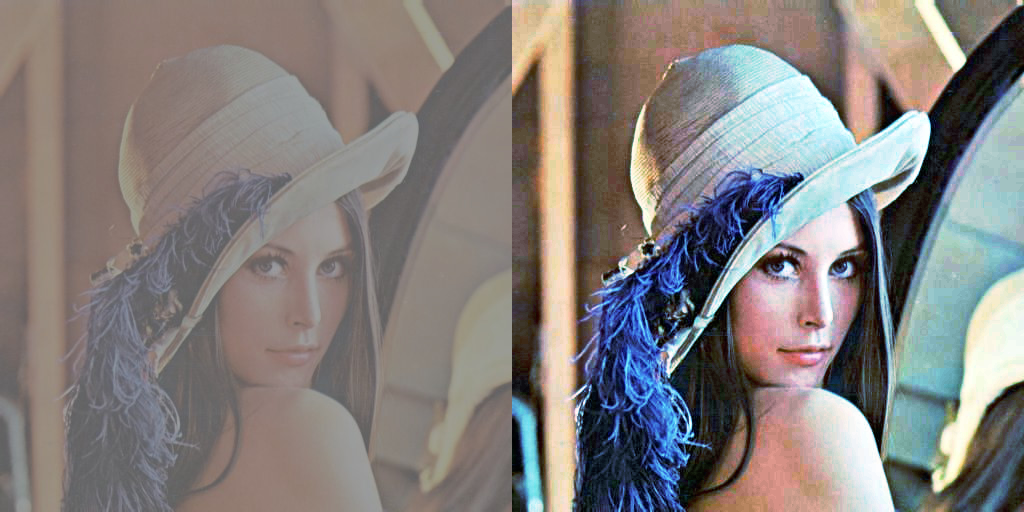

In [ ]:
image = cv.imread('/content/drive/MyDrive/lena_lc.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

r,g,b = cv.split(image)

equ_r = cv.equalizeHist(r)
equ_g = cv.equalizeHist(g)
equ_b = cv.equalizeHist(b)

equ = cv.merge((equ_r, equ_g, equ_b))

res = np.hstack((image, equ))
cv2_imshow(res)


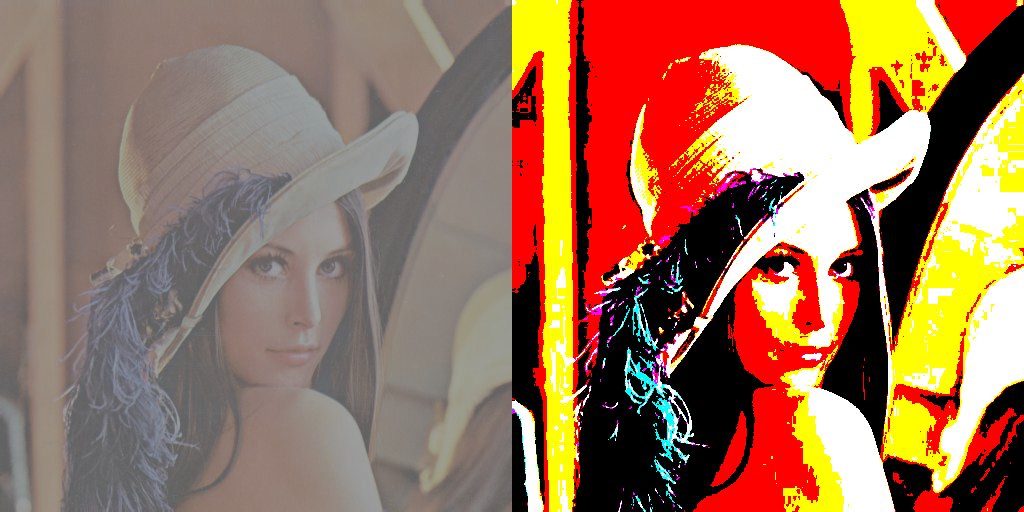

In [7]:
image = cv.imread('/content/drive/MyDrive/lena_lc.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Warna dasar yang akan digunakan
colors = {
    'black': [0, 0, 0],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'white': [255, 255, 255]
}

# Fungsi untuk menemukan warna dasar terdekat
def closest_color(pixel):
    # Hitung jarak Euclidean dari pixel ke setiap warna dasar
    min_dist = float('inf')
    closest_color = None
    for color_name, color_value in colors.items():
        dist = np.linalg.norm(pixel - color_value)
        if dist < min_dist:
            min_dist = dist
            closest_color = color_value
    return closest_color


# Proses mapping warna pada setiap pixel
new_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        new_image[i, j] = closest_color(image[i, j])

# Simpan dan tampilkan gambar hasil
# cv.imwrite('lena_8_colors.jpg', new_image)
frame = cv.hconcat([image, new_image])
cv2_imshow(frame)

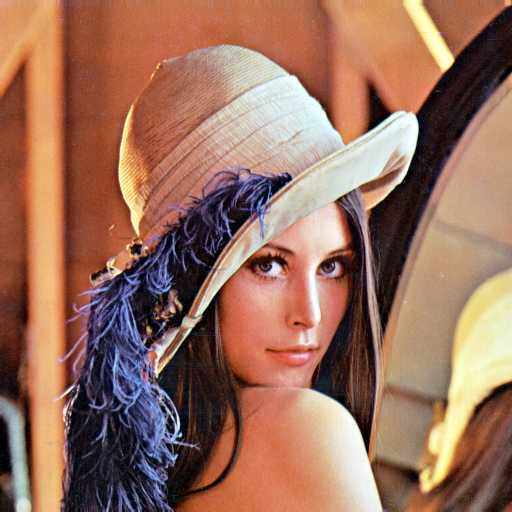

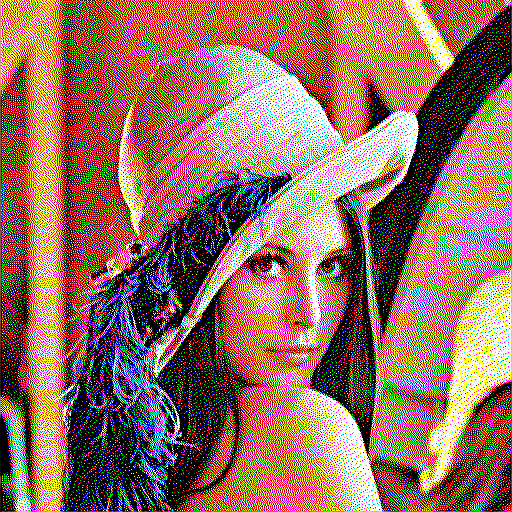

In [36]:
image = cv.imread('/content/drive/MyDrive/lena.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

cv2_imshow(image)
def threshold(color):
  if color>255:
    return 255
  elif color<0:
    return 0
  else:
    return color



for y in range(image.shape[0]-1):
  for x in range(1,image.shape[1]-1):
    # jarak pixel tetangga
    pixelBlueOld = image[y,x,2]
    pixelGreenOld = image[y,x,1]
    pixelRedOld = image[y,x,0]
    jarakPixel = 1
    # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
    pixelBlueNew = np.round(jarakPixel * pixelBlueOld/255.0)*(255.0/jarakPixel)
    pixelGreenNew = np.round(jarakPixel * pixelGreenOld/255.0)*(255.0/jarakPixel)
    pixelRedNew = np.round(jarakPixel * pixelRedOld/255.0)*(255.0/jarakPixel)

    image[y,x,2] = pixelBlueNew
    image[y,x,1] = pixelGreenNew
    image[y,x,0] = pixelRedNew

    # Menghitung kuantitasi error untuk masuk rumus
    errorBlue = pixelBlueOld - pixelBlueNew
    errorGreen = pixelGreenOld - pixelGreenNew
    errorRed = pixelRedOld - pixelRedNew

    error = np.array([errorRed,errorGreen,errorBlue])
    # Lakukan untuk semua channel warna
    # Implementasi rumus disthering floyd and steinberg
    for i in range(3):
      image[y,x+1,i] = threshold(image[y,x+1,i] + error[i] * 7/16)
      image[y+1,x-1,i] = threshold(image[y+1,x-1,i] + error[i] * 3/16)
      image[y+1,x,i] = threshold(image[y+1,x,i] + error[i] * 5/16)
      image[y+1,x+1,i] = threshold(image[y+1,x+1,i] + error[i] * 1/16)


cv2_imshow(image)
